In [3]:
%matplotlib inline

from tdt import read_block
import numpy as np
from numpy import savetxt
from numpy import stack
import matplotlib.pyplot as plt
import os
import pandas as pd
import statistics
import seaborn as sns
import glob
import chart_studio.plotly as py
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

print(__version__)


5.4.0


In [4]:
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()

In [5]:
t_base_1_raw = pd.read_csv('raw AgRP_DIOFP1_base_210920_1.csv')
t_base_1_raw.head(5)

# time  rawGCAMP   rawISOS  rawfitISOS     rawdFF
0  0.000983  0.290793  0.574948   47.794407 -99.391571
1  0.001966  0.301469  0.573493   47.793625 -99.369232
2  0.002949  0.312068  0.571590   47.792603 -99.347031
3  0.003932  0.322565  0.569241   47.791344 -99.325050
4  0.004915  0.332938  0.566447   47.789845 -99.303322

In [6]:
len(t_base_1_raw)

6894592

In [7]:
# t_base_1_raw.iplot()

In [8]:
t_base_1_smooth = pd.read_csv('smooth AgRP_DIOFP1_base_210920_1.csv')
t_base_1_smooth.head(5)

# time  smoothGCAMP  smoothISOS  smoothfitISOS   smoothdFF
0  0.020644    38.534176   37.005791      18.173920  112.030077
1  1.020395    83.851730   80.872963      83.634601    0.259617
2  2.020147    90.675945   87.739925      93.881809   -3.414787
3  3.019899    90.694698   87.699760      93.821873   -3.333097
4  4.019650    90.525990   87.601524      93.675280   -3.361923

In [9]:
len(t_base_1_smooth)

6777

In [10]:
t_base_1_smooth.iplot()

<AxesSubplot:>

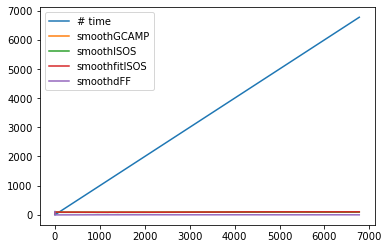

In [11]:
t_base_1_smooth.plot()

In [12]:
t_base_1_smooth.iplot()

### TRIM THERMAL Section of FILES TO SAME LENGTH

In [13]:
# DEFINE T=0


# cut files to 4620 seconds from t=0 (timestamp in notes "t-30C")


In [14]:
pd.read_csv()

pd.write_csv()

TypeError: read_csv() missing 1 required positional argument: 'filepath_or_buffer'

In [ ]:
fp = []

fp_files = np.sort(glob.glob('smooth*.csv'))

for f in fp_files:
    fp.append(pd.read_csv(f))
    fp[-1] = fp[-1].set_index('time')
    fp[-1].index = pd.DatetimeIndex(fp[-1].index)
    
len(fp_files)


In [ ]:
fp_files.head(5)

In [ ]:
fp[0].dFF

In [ ]:
# just show time-aligned data
plt.figure(figsize=(16,16))
for i in range(len(fp_files)):
    plt.subplot(8,8,i+1)
    plt.plot(fp[i].ts,fp[i].dFF)
    plt.title(fp_files[i])

In [ ]:
LICK_on = data.epocs[LICK].onset
LICK_off = data.epocs[LICK].offset
# Add the first and last time stamps to make tails on the TTL stream
LICK_x = np.append(np.append(time[0], np.reshape(np.kron([LICK_on, LICK_off],
                   np.array([[1], [1]])).T, [1,-1])[0]), time[-1])
sz = len(LICK_on)
d = data.epocs[LICK].data
# Add zeros to beginning and end of 0,1 value array to match len of LICK_x
LICK_y = np.append(np.append(0,np.reshape(np.vstack([np.zeros(sz),
    d, d, np.zeros(sz)]).T, [1, -1])[0]),0)

y_scale = 10 #adjust according to data needs
y_shift = -20 #scale and shift are just for asthetics



In [ ]:
fig3 = plt.figure(figsize=(20,12))
ax2 = fig3.add_subplot(311)

p1, = ax2.plot(time, dFF, linewidth=2, color='green', label='GCaMP')
p2, = ax2.plot(LICK_x, y_scale*LICK_y+y_shift, linewidth=2, color='dodgerblue', label='dTemp')
ax2.set_ylabel(r'$\Delta$F/F')
ax2.set_xlabel('Seconds')
ax2.set_title('dFF with Temp transitions')
ax2.legend(handles=[p1,p2], loc='upper right')
fig3.tight_layout()

In [ ]:
START = 'T=0'

THERMAL_TIMES = {
        "name":TEMP_SHIFT,
        "onset":[],
        "offset":[],
        "type_str":data.epocs[LICK].type_str,
        "data":[]
        }
# pass StructType our new dictionary to make keys and values
data.epocs.LICK_EVENT = tdt.StructType(LICK_DICT)

lick_on_diff = np.diff(data.epocs[LICK].onset)
BOUT_TIME_THRESHOLD = 10
lick_diff_ind = np.where(lick_on_diff >= BOUT_TIME_THRESHOLD)[0]
#for some reason np.where returns a 2D array, hence the [0]

# Make an onset/ offset array based on threshold indicies
diff_ind = 0
for ind in lick_diff_ind: 
    # BOUT onset is thresholded onset index of lick epoc event
    data.epocs[LICK_EVENT].onset.append(data.epocs[LICK].onset[diff_ind])
    # BOUT offset is thresholded offset of lick event before next onset
    data.epocs[LICK_EVENT].offset.append(data.epocs[LICK].offset[ind])
    # set the values for data, arbitrary 1
    data.epocs[LICK_EVENT].data.append(1)
    diff_ind = ind + 1

# special case for last event to handle lick event offset indexing
data.epocs[LICK_EVENT].onset.append(data.epocs[LICK].onset[lick_diff_ind[-1]+1])
data.epocs[LICK_EVENT].offset.append(data.epocs[LICK].offset[-1])
data.epocs[LICK_EVENT].data.append(1)

# Now determine if it was a 'real' lick bout by thresholding by some
# user-set number of licks in a row
MIN_LICK_THRESH = 4 #four licks or more make a bout
licks_array = []

# Find number of licks in licks_array between onset and offset of 
# our new lick BOUT LICK_EVENT
for on, off in zip(data.epocs[LICK_EVENT].onset,data.epocs[LICK_EVENT].offset):
    licks_array.append(
        len(np.where((data.epocs[LICK].onset >= on) & (data.epocs[LICK].onset <= off))[0]))

# Remove onsets, offsets, and data of thrown out events
licks_array = np.array(licks_array)
inds = np.where(licks_array<MIN_LICK_THRESH)[0]
for index in sorted(inds, reverse=True):
    del data.epocs[LICK_EVENT].onset[index]
    del data.epocs[LICK_EVENT].offset[index]
    del data.epocs[LICK_EVENT].data[index]

# Make a continuous time series for lick BOUTS for plotting
LICK_EVENT_on = data.epocs[LICK_EVENT].onset
LICK_EVENT_off = data.epocs[LICK_EVENT].offset
LICK_EVENT_x = np.append(time[0], np.append(
    np.reshape(np.kron([LICK_EVENT_on, LICK_EVENT_off],np.array([[1], [1]])).T, [1,-1])[0], time[-1]))
sz = len(LICK_EVENT_on)
d = data.epocs[LICK_EVENT].data
LICK_EVENT_y = np.append(np.append(
    0, np.reshape(np.vstack([np.zeros(sz), d, d, np.zeros(sz)]).T, [1 ,-1])[0]), 0)

In [ ]:
import os
import sys
import glob
import h5py
import json
import math
import numpy as np 
import pandas as pd 
import multiprocessing as mp
from scipy.signal import argrelextrema
import matplotlib.pyplot as plt
from preprocess import get_all_stores_for_combining_data


def read_hdf5(event, filepath, key):
	if event:
		op = os.path.join(filepath, event+'.hdf5')
	else:
		op = filepath

	if os.path.exists(op):
		with h5py.File(op, 'r') as f:
			arr = np.asarray(f[key])
	else:
		raise Exception('{}.hdf5 file does not exist'.format(event))

	return arr


def processChunks(arrValues, arrIndexes):
    
    arrValues = arrValues[~np.isnan(arrValues)] 
    median = np.median(arrValues)			
    										
    mad = np.median(np.abs(arrValues-median))   
    										
    firstThreshold = median + (2*mad)
    										
    										
    greaterThanMad = np.where(arrValues>firstThreshold)[0]
    

    arr = np.arange(arrValues.shape[0])
    lowerThanMad = np.isin(arr, greaterThanMad, invert=True)
    filteredOut = arrValues[np.where(lowerThanMad==True)[0]]
    
    filteredOutMedian = np.median(filteredOut)
    filteredOutMad = np.median(np.abs(filteredOut-np.median(filteredOut)))
    secondThreshold = filteredOutMedian+(3*filteredOutMad)

    greaterThanThreshIndex = np.where(arrValues>secondThreshold)[0]
    greaterThanThreshValues = arrValues[greaterThanThreshIndex]
    temp = np.zeros(arrValues.shape[0])
    temp[greaterThanThreshIndex] = greaterThanThreshValues
    peaks = argrelextrema(temp, np.greater)[0]

    firstThresholdY = np.full(arrValues.shape[0], firstThreshold)
    secondThresholdY = np.full(arrValues.shape[0], secondThreshold)


    newPeaks = np.full(arrValues.shape[0], np.nan)
    newPeaks[peaks] = peaks + arrIndexes[0]

    #madY = np.full(arrValues.shape[0], mad)
    medianY = np.full(arrValues.shape[0], median)
    filteredOutMedianY = np.full(arrValues.shape[0], filteredOutMedian)

    return peaks, mad, filteredOutMad, medianY, filteredOutMedianY, firstThresholdY, secondThresholdY



def createChunks(z_score, sampling_rate, window):
	
	print('Creating chunks for multiprocessing...')

	windowPoints = math.ceil(sampling_rate*window)
	remainderPoints = math.ceil((sampling_rate*window) - (z_score.shape[0]%windowPoints))


	if remainderPoints==windowPoints:
		padded_z_score = z_score
		z_score_index = np.arange(padded_z_score.shape[0])
	else:
	    padding = np.full(remainderPoints, np.nan)
	    padded_z_score = np.concatenate((z_score, padding))
	    z_score_index = np.arange(padded_z_score.shape[0])

	reshape = padded_z_score.shape[0]/windowPoints

	if reshape.is_integer()==True:
	    z_score_chunks = padded_z_score.reshape(int(reshape), -1)
	    z_score_chunks_index = z_score_index.reshape(int(reshape), -1)
	else:
	    raise Exception('Reshaping values should be integer.')

	print('Chunks are created for multiprocessing.')
	return z_score_chunks, z_score_chunks_index


def calculate_freq_amp(arr, z_score, z_score_chunks_index, timestamps):
	peaks = arr[:,0]
	filteredOutMedian = arr[:,4]
	count = 0
	peaksAmp = np.array([])
	peaksInd = np.array([])
	for i in range(z_score_chunks_index.shape[0]):
	    count += peaks[i].shape[0]
	    peaksIndexes = peaks[i]+z_score_chunks_index[i][0]
	    peaksInd = np.concatenate((peaksInd, peaksIndexes))
	    amps = z_score[peaksIndexes]-filteredOutMedian[i][0]
	    peaksAmp = np.concatenate((peaksAmp, amps))

	peaksInd = peaksInd.ravel()
	peaksInd = peaksInd.astype(int)
	#print(timestamps)
	freq = peaksAmp.shape[0]/((timestamps[-1]-timestamps[0])/60)

	return freq, peaksAmp, peaksInd

def create_Df(filepath, arr, name, index=[], columns=[]):

	op = os.path.join(filepath, 'freqAndAmp_'+name+'.h5')
	dirname = os.path.dirname(filepath)

	df = pd.DataFrame(arr, index=index, columns=columns)

	df.to_hdf(op, key='df', mode='w')

def create_csv(filepath, arr, name, index=[], columns=[]):
	op = os.path.join(filepath, name)
	df = pd.DataFrame(arr, index=index, columns=columns)
	df.to_csv(op)

def read_Df(filepath, name):
	op = os.path.join(filepath, 'freqAndAmp_'+name+'.h5')
	df = pd.read_hdf(op, key='df', mode='r')

	return df

def visuzlize_peaks(filepath, z_score, timestamps, peaksIndex):

	dirname = os.path.dirname(filepath)

	basename = (os.path.basename(filepath)).split('.')[0]
	fig = plt.figure()
	ax = fig.add_subplot(111)
	ax.plot(timestamps,z_score, '-',
			timestamps[peaksIndex], z_score[peaksIndex], 'o')
	ax.set_title(basename)
	fig.suptitle(os.path.basename(dirname))
	#plt.show()

def findFreqAndAmp(filepath, inputParameters, window=15):

	print('calculating frequency and amplitude of transients in z-score data....')
	selectForTransientsComputation = inputParameters['selectForTransientsComputation']

	if selectForTransientsComputation=='z_score':
		path = glob.glob(os.path.join(filepath, 'z_score_*'))
	elif selectForTransientsComputation=='dff':
		path = glob.glob(os.path.join(filepath, 'dff_*'))
	else:
		path = glob.glob(os.path.join(filepath, 'z_score_*')) + glob.glob(os.path.join(filepath, 'dff_*'))

	for i in range(len(path)):
		basename = (os.path.basename(path[i])).split('.')[0]
		name_1 = basename.split('_')[-1]
		sampling_rate = read_hdf5('timeCorrection_'+name_1, filepath, 'sampling_rate')[0]
		z_score = read_hdf5('', path[i], 'data')
		z_score_chunks, z_score_chunks_index = createChunks(z_score, sampling_rate, window)

		#p = mp.Pool(mp.cpu_count())
		with mp.Pool(mp.cpu_count()) as p:
			result = p.starmap(processChunks, zip(z_score_chunks, z_score_chunks_index))
		#p.close()
		#p.join()
		
		result = np.asarray(result, dtype=object)
		ts = read_hdf5('timeCorrection_'+name_1, filepath, 'timestampNew')
		freq, peaksAmp, peaksInd = calculate_freq_amp(result, z_score, z_score_chunks_index, ts)
		peaks_occurrences = np.array([ts[peaksInd], peaksAmp]).T
		arr = np.array([[freq, np.mean(peaksAmp)]])
		fileName = [os.path.basename(os.path.dirname(filepath))]
		create_Df(filepath, arr, basename, index=fileName ,columns=['freq (events/min)', 'amplitude'])
		create_csv(filepath, arr, 'freqAndAmp_'+basename+'.csv', 
				   index=fileName, columns=['freq (events/min)', 'amplitude'])
		create_csv(filepath, peaks_occurrences, 'transientsOccurrences_'+basename+'.csv', 
				   index=np.arange(peaks_occurrences.shape[0]),columns=['timestamps', 'amplitude'])
		visuzlize_peaks(path[i], z_score, ts, peaksInd)
	
	print('Frequency and amplitude of transients in z_score data are calculated.')
		


def makeAverageDir(filepath):

	op = os.path.join(filepath, 'average')
	if not os.path.exists(op):
		os.mkdir(op)

	return op	

def averageForGroup(folderNames, inputParameters):

	print('Combining results for frequency and amplitude of transients in z-score data...')
	path = []
	abspath = inputParameters['abspath']
	selectForTransientsComputation = inputParameters['selectForTransientsComputation']
	path_temp_len = []

	for i in range(len(folderNames)):
		if selectForTransientsComputation=='z_score':
			path_temp = glob.glob(os.path.join(folderNames[i], 'z_score_*')) 
		elif selectForTransientsComputation=='dff':
			path_temp = glob.glob(os.path.join(folderNames[i], 'dff_*'))
		else:
			path_temp = glob.glob(os.path.join(folderNames[i], 'z_score_*')) + glob.glob(os.path.join(folderNames[i], 'dff_*'))

		path_temp_len.append(len(path_temp))

		for j in range(len(path_temp)):
			basename = (os.path.basename(path_temp[j])).split('.')[0]
			#name = name[0]
			temp = [folderNames[i], basename]
			path.append(temp)


	path_temp_len = np.asarray(path_temp_len)
	max_len = np.argmax(path_temp_len)

	naming = []
	for i in range(len(path)):
		naming.append(path[i][1])
	naming = np.unique(np.asarray(naming))
	

	new_path = [[] for _ in range(path_temp_len[max_len])]
	for i in range(len(path)):
		idx = np.where(naming==path[i][1])[0][0]
		new_path[idx].append(path[i])

	op = makeAverageDir(abspath)

	
	for i in range(len(new_path)):
		arr = [] #np.zeros((len(new_path[i]), 2))
		fileName = []
		temp_path = new_path[i]
		for j in range(len(temp_path)):
			if not os.path.exists(os.path.join(temp_path[j][0], 'freqAndAmp_'+temp_path[j][1]+'.h5')):
				continue
			else:
				df = read_Df(temp_path[j][0], temp_path[j][1])
				arr.append(np.array([df['freq (events/min)'][0], df['amplitude'][0]]))
				fileName.append(os.path.basename(temp_path[j][0]))

		arr = np.asarray(arr)
		create_Df(op, arr, temp_path[j][1], index=fileName, columns=['freq (events/min)', 'amplitude'])
		create_csv(op, arr, 'freqAndAmp_'+temp_path[j][1]+'.csv', index=fileName, columns=['freq (events/min)', 'amplitude'])

	print('Results for frequency and amplitude of transients in z-score data are combined.')

def executeFindFreqAndAmp(inputParametersPath):

	print('Finding transients in z-score data and calculating frequency and amplitude....')
	with open(inputParametersPath) as f:	
		inputParameters = json.load(f)

	average = inputParameters['averageForGroup']
	folderNamesForAvg = inputParameters['folderNamesForAvg']
	folderNames = inputParameters['folderNames']
	combine_data = inputParameters['combine_data']
	moving_window = inputParameters['moving_window']

	if average==True:
		if len(folderNamesForAvg)>0:
			storesListPath = []
			for i in range(len(folderNamesForAvg)):
				filepath = folderNamesForAvg[i]
				storesListPath.append(glob.glob(os.path.join(filepath, '*_output_*')))
			storesListPath = np.concatenate(storesListPath)
			averageForGroup(storesListPath, inputParameters)
		else:
			raise Exception('Not a single folder name is provided in folderNamesForAvg in inputParamters File.')
			
			
	else:
		if combine_data==True:
			storesListPath = []
			for i in range(len(folderNames)):
				filepath = folderNames[i]
				storesListPath.append(glob.glob(os.path.join(filepath, '*_output_*')))
			storesListPath = list(np.concatenate(storesListPath).flatten())
			op = get_all_stores_for_combining_data(storesListPath)
			for i in range(len(op)):
				filepath = op[i][0]
				storesList = np.genfromtxt(os.path.join(filepath, 'storesList.csv'), dtype='str', delimiter=',')
				findFreqAndAmp(filepath, inputParameters, window=moving_window)
			plt.show()
		else:
			for i in range(len(folderNames)):
				filepath = folderNames[i]
				storesListPath = glob.glob(os.path.join(filepath, '*_output_*'))
				for j in range(len(storesListPath)):
					filepath = storesListPath[j]
					storesList = np.genfromtxt(os.path.join(filepath, 'storesList.csv'), dtype='str', delimiter=',')
					findFreqAndAmp(filepath, inputParameters, window=moving_window)
			plt.show()

	print('Transients in z-score data found and frequency and amplitude are calculated.')


if __name__ == "__main__":
	executeFindFreqAndAmp(sys.argv[1:][0])